# Spike Computational Neuroscience Community
<div style="font-family: Arial, sans-serif; margin: 20px;">
    <h1 style="text-align: center; color: #333;">EEG Processing: An Entry to the World of Brain Waves</h1>
    <h2 style="text-align: center; color: #555;">Home Work 4: Python - Numpy</h2>
    <p style="text-align: center; color: #666; font-size: 16px;">
        Author: Mohammadreza Shahsavari<br>
        Contact: <a href="mailto:mohamadrezashahsavary@gmail.com" style="color: #0066cc; text-decoration: none;">mohamadrezashahsavary@gmail.com</a>
    </p>
</div>







# 1. Download and Inspect the EEG Data

After running the first cell that downloads the EEG `.mat` data into `eeg_mat_path`, your task is to inspect the structure of the data. Print the **number of channels** and the **number of time points (samples)** for each channel. This will help you understand the dimensions of the data.

**Questions**:

*   Why is this important?






## Run the Below Cell to Download the EDF Data


In [ ]:
# Installing the required library for reading EDF files
!pip install pyEDFlib

# Dowloading the EDF data
import gdown
import os

eeg_edf_url = 'https://drive.google.com/uc?id=1G-COaUG7JZrTFWJPKZ7He2xt4dpf_zhy'

eeg_edf_file_name = 'S001R01.mat'


gdown.download(eeg_edf_url, eeg_edf_file_name, quiet=False)

eeg_mat_path = os.path.join('/content', eeg_edf_file_name)

print('\n\nEEG files are downloaded and can be dound in the following paths:')
print(eeg_mat_path)

!ls -l /content

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.5 MB/s eta 0:00:00


Downloading...
From (original): https://drive.google.com/uc?id=1G-COaUG7JZrTFWJPKZ7He2xt4dpf_zhy
From (redirected): https://drive.google.com/uc?id=1G-COaUG7JZrTFWJPKZ7He2xt4dpf_zhy&confirm=t&uuid=0c623474-f8d3-40aa-b84c-7278e909aad0
To: /content/S001R01.mat
100%|██████████| 5.00M/5.00M [00:00<00:00, 45.6MB/s]




EEG files are downloaded and can be dound in the following paths:
/content/S001R01.mat
total 4888
-rw-r--r-- 1 root root 4997696 Aug 24 09:59 S001R01.mat
drwxr-xr-x 1 root root    4096 Aug 22 13:24 sample_data


##Load the EDF File to Pyton and Inspect the EEG Data in the Cell Below

In [ ]:
from scipy.io import loadmat

eeg_data = loadmat(eeg_mat_path)


#print(eeg_data.keys())



n_samples = eeg_data['signals'].shape[1]
duration = eeg_data['duration'][0][0]


eeg_signals = eeg_data['signals']

print(eeg_data.keys())

sampling_rate = int(n_samples/duration)




dict_keys(['__header__', '__version__', '__globals__', 'signals', 'labels', 'duration'])


# 2. Select Specific Channels and Data Segments

Now that you're familiar with the data structure, extract the `first 32 channels` and the `first 10 seconds` of the signals. Verify the dimensions of the extracted data to ensure accuracy.

**Questions**
* Why is this important?



In [ ]:
selected_eeg_data = eeg_signals[0:32, 0:10*sampling_rate]

print(selected_eeg_data.shape)

(32, 1600)


# 3. Calculate Mean and Standard Deviation

Next, calculate the **mean** and **standard deviation** for each selected channel. The mean provides an average value over time, while the standard deviation gives insight into how much the data fluctuates around that mean.

**Questions:**

  * Why are these statistical measures useful in analyzing EEG data?



In [ ]:
import numpy as np

print(eeg_signals.shape)

channel_means = np.mean(eeg_signals, axis=1)

print(channel_means.shape)





(64, 9760)
(64,)


# 4. Check for NaN Values and Fill Them

Check if there are any **NaN (Not a Number)** values in the data. If any NaN values are found, fill these missing values using <u> the mean of the previous and next time step in that particular channel</u>
.

**Questions:**

- What are NaN values?
- How might NaN values be introduced into EEG data?



In [ ]:
for channel_indx in range(eeg_signals.shape[0]):
  eeg_channel = eeg_signals[channel_indx]
  for sample_indx in range (eeg_channel.shape[0] - 1):
    if np.isnan(eeg_signals)[channel_indx, sample_indx]:
      if np.isnan(eeg_signals)[channel_indx, sample_indx + 1]:
        eeg_signals[channel_indx, sample_indx] = (eeg_signals[channel_indx, sample_indx - 1] + eeg_signals[channel_indx, sample_indx + 2]) / 2
      else:
        eeg_signals[channel_indx, sample_indx] = (eeg_signals[channel_indx, sample_indx - 1] + eeg_signals[channel_indx, sample_indx + 1]) / 2




In [ ]:
print(np.sum(np.isnan(eeg_signals)))

0


# 5. Normalize the Data

Normalize the data using two techniques: **Min-Max Normalization** and **Z-Normalization**.

- Min-Max Normalization scales the data to a fixed range, typically between 0 and 1.
- Z-Normalization transforms the data so that it has a mean of 0 and a standard deviation of 1.

**Questions:**

- Why is normalization helpful when working with EEG data?
- wich one of the min-max or Z normalization is more important and the most frequently used?



## Do min-max Normalization Here

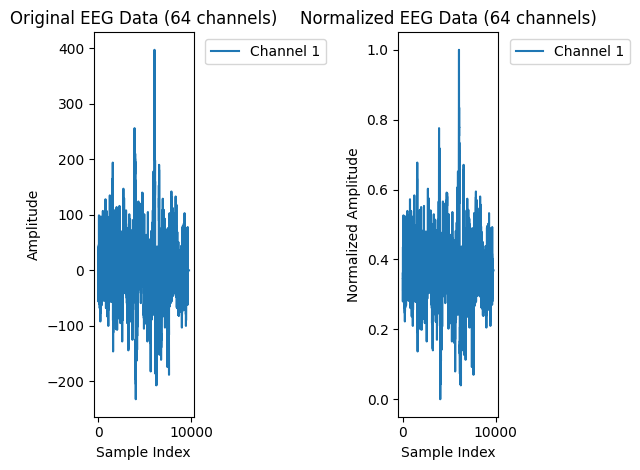

In [ ]:
######## ENTER YOUR CODE HERE ########

channel_mins = np.min(eeg_signals, axis=1, keepdims=True)
channel_maxs = np.max(eeg_signals, axis =1, keepdims=True)

eeg_data_normalized = (eeg_signals - channel_mins) / (channel_maxs - channel_mins)


######################################
import matplotlib.pyplot as plt

# Assuming 'eeg_data' is your original data before normalization and 'eeg_data_normalized' is your data after normalization
# Plot original data
plot_channel = 0  # Change this to the channel you want to plot
plt.subplot(1, 2, 1)
plt.plot(eeg_signals[plot_channel, :])
plt.title('Original EEG Data (64 channels)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend([f'Channel {i+1}' for i in range(64)], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Plot normalized data
plt.subplot(1, 2, 2)
plt.plot(eeg_data_normalized[plot_channel, :])
plt.title('Normalized EEG Data (64 channels)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Amplitude')
plt.legend([f'Channel {i+1}' for i in range(64)], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()


## Do Z - Normalization Here

In [ ]:
import matplotlib.pyplot as plt

######## ENTER YOUR CODE HERE ########
eeg_data_normalized = None   # you have to calculate this



######################################

# Assuming 'eeg_data' is your original data before normalization and 'eeg_data_normalized' is your data after normalization
# Plot original data
plot_channel = 0  # Change this to the channel you want to plot
plt.subplot(1, 2, 1)
plt.plot(eeg_data[plot_channel, :])
plt.title('Original EEG Data (64 channels)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend([f'Channel {i+1}' for i in range(64)], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Plot normalized data
plt.subplot(1, 2, 2)
plt.plot(eeg_data_normalized[plot_channel, :])
plt.title('Normalized EEG Data (64 channels)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Amplitude')
plt.legend([f'Channel {i+1}' for i in range(64)], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()


# 6. Calculate Windowed Correlation Between Two Channels

Calculate the correlation between the first two EEG channels. Before doing so, let's discuss windowing:

**Windowing:**

Windowing is the process of dividing a continuous EEG signal into smaller overlapping segments (windows) to track changes over time. This is useful for calculating correlations between EEG channels in shorter, more focused intervals.

For example, with a 1-second window and a 0.5-second stride:

- Start with the first window from 0 to 1 second.
- Slide the window by 0.5 seconds to create the next one, covering 0.5 to 1.5 seconds.
- Continue sliding the window: 1 to 2 seconds, 1.5 to 2.5 seconds, and so on.

For example, with a 1-second window and 0.5-second stride, the windows would be: 0 to 1 s, 0.5 to 1.5 s, 1 to 2 s, and so on, with correlations calculated within each window.



**Questions:**

- Why is correlation important in EEG data analysis?
- What are the advantages of calculating correlation using windowing compared to calculating correlation over the entire EEG signal?


In [ ]:
# Extract Signal 1 and Signal 2 from the EEG data (channels 1 and 2)
signal1 = eeg_data[0, :]  # Channel 1
signal2 = eeg_data[1, :]  # Channel 2

######## ENTER YOUR CODE HERE ########
#  Find the windowed correlation between 'signal1' and 'signal2'

correlation_signal = None   # You have to calculate this
window_centers = None   # You have to calculate this

######################################
# Sampling rate and time calculation
sampling_rate = 160  # Hz
n_samples = eeg_data.shape[1]  # Number of samples based on the signal data
time = np.arange(0, n_samples) / sampling_rate  # Time in seconds



# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot both signals on the same subplot
axs[0].plot(time, signal1, label='Channel 1')
axs[0].plot(time, signal2, label='Channel 2', alpha=0.7)  # using alpha for transparency
axs[0].set_title('Channel 1 and Channel 2')
axs[0].set_xlabel('Time (seconds)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot correlation
axs[1].plot(window_centers, correlation_signal, label='Correlation', color='r')
axs[1].set_title('Sliding Window Correlation')
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Correlation Coefficient')
axs[1].legend()

plt.tight_layout()
plt.show()


# 7. Calculate the Functional Connectivity of the EEG Data

Calculate the functional connectivity of the EEG data by computing the **correlation** between all pairs of channels. Visualize this using a **correlation matrix** (or heatmap).

**Questions:**

- Why is functional connectivity important?
- What does the functional connectivity matrix (correlation matrix) look like for an n-channel EEG dataset, and how should each dimension of the matrix be interpreted?

In [ ]:
######## ENTER YOUR CODE HERE ########
# Calculate the correlation matrix
correlation_matrix = None   # You have to calculate this



######################################

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'correlation_matrix' is your calculated correlation matrix

# Create a heatmap of the correlation matrix without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('EEG Functional Connectivity (Correlation Map)')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()